In [29]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [30]:
df=pd.read_csv("Social_Network_Ads.csv")

In [31]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [33]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [34]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

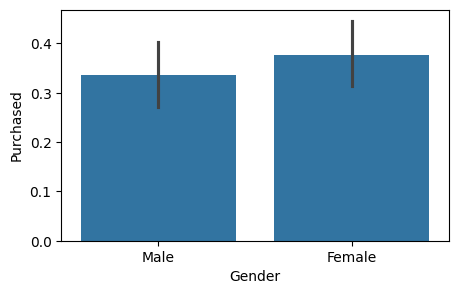

In [35]:

plt.figure(figsize=(5,3))
sns.barplot(x="Gender",y="Purchased",data=df)
plt.show()

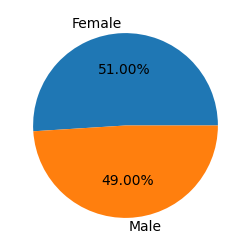

In [36]:
plt.figure(figsize=(5,3))
plt.pie(x=df['Gender'].value_counts().values,
        labels=df["Gender"].value_counts().index,
        autopct='%0.2f%%')
plt.show()


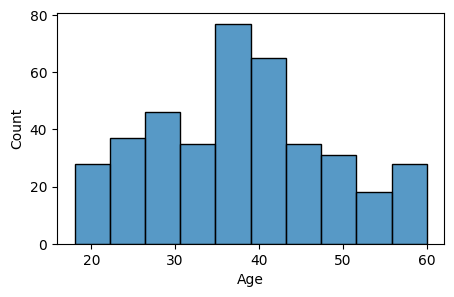

In [37]:
plt.figure(figsize=(5,3))
sns.histplot(data=df,x="Age")
plt.show()

In [38]:
df['User ID'].nunique()

400

In [39]:
df.drop("User ID",axis=1,inplace=True)

In [40]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [42]:
import pickle
with open("Gender_enc.pkl","wb")as f:
    pickle.dump(le,f)

In [43]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [44]:
x= df.iloc[:,:3]
y= df.iloc[:,3]

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(0.3))

In [46]:
x_train.shape

(280, 3)

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="gini",random_state=42)
dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [48]:
with open("dt_model.pkl","wb") as f:
    pickle.dump(dt,f)

In [49]:
y_pred=dt.predict(x_test)

In [50]:
y_pred[:10]

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [51]:
print("Actual_data",list(y_test[:10]))
print("predect_data",y_pred[:10])

Actual_data [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
predect_data [0 0 1 0 1 0 0 0 0 0]


In [52]:
from sklearn.metrics import accuracy_score,recall_score
print(f"Accuracy:{accuracy_score(y_test,y_pred)*100}")

Accuracy:82.5


In [53]:
with open("dt_model.pkl",'rb')as file:
    model=pickle.load(file)

In [54]:
pred=model.predict([[0,35,90000]])

if pred==0:
    print("not purchased")
else:
    print("parchased")

parchased


randam forest classifer


In [55]:
from sklearn.ensemble import  RandomForestClassifier
rfe=RandomForestClassifier(n_estimators=50,criterion='entropy')
rfe.fit(x_train,y_train)


,n_estimators,50
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
rfe_pred=rfe.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score

In [60]:
accuracy_score(y_test,rfe_pred)

0.8416666666666667